In [ ]:
# download any stock related data
import yfinance as yf
import datetime.datetime as dt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Time Series Data

In [ ]:
apple_stock_data = yf.download('AAPL', period='1y')
apple_stock_data.columns = apple_stock_data.columns.droplevel(1)

tesla_stock_data = yf.download('TSLA', period='1y')
tesla_stock_data.columns = tesla_stock_data.columns.droplevel(1)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query1.finance.yahoo.com\', port=443): Max retries exceeded with url: /v1/test/getcrumb (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022DD8DB2E40>: Failed to resolve \'query1.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TSLA']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query1.finance.yahoo.com\', port=443): Max retries exceeded with url: /v1/test/getcrumb (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022DD8E5C410>: Failed to resolve \'query1.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))


YF.download() has changed argument auto_adjust default to True


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [ ]:
apple_stock_data.head()

In [ ]:
prices = apple_stock_data.Close
tesla_prices = tesla_stock_data.Close
prices.head(3)

Ticker,AAPL
Date,


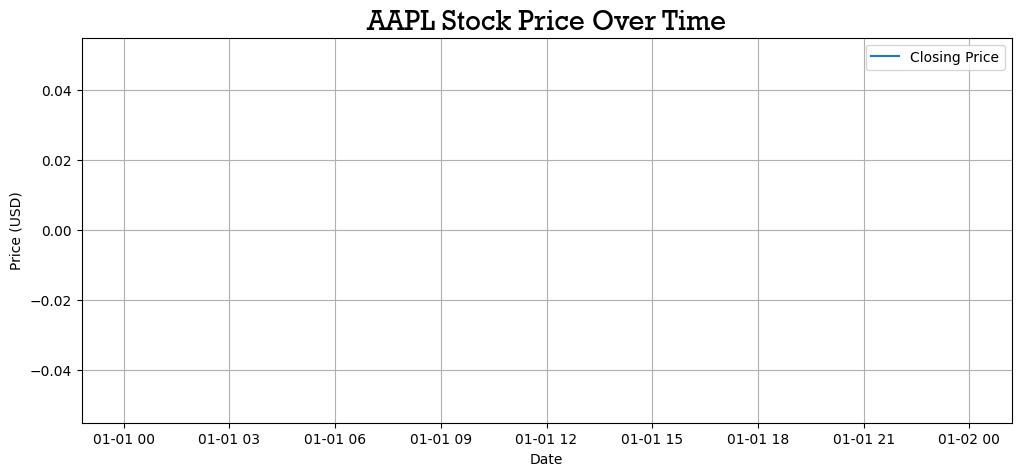

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(prices.index, prices, label='Closing Price')

plt.title("AAPL Stock Price Over Time", fontname='Rockwell', fontsize=20)
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tesla_df['Close'].plot(xlim=['2024-02-29', '2025-02-28'], figsize=(12, 4), c='green', linestyle='--')
plt.show()

In [ ]:
tesla_df.loc[str(dt.date(dt.now()))].to_dict()

# Classical-TS & STL Decomposition 

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

decomposition_additive = seasonal_decompose(prices, model='additive', period=30)
decomposition_stl = STL(prices, period=30) # model always additive

ValueError: x must have 2 complete cycles requires 60 observations. x only has 0 observation(s)

In [ ]:
trend_add = decomposition_additive.trend
seasonal_add = decomposition_additive.seasonal
resid_add = decomposition_additive.resid

In [ ]:
result = decomposition_stl.fit()

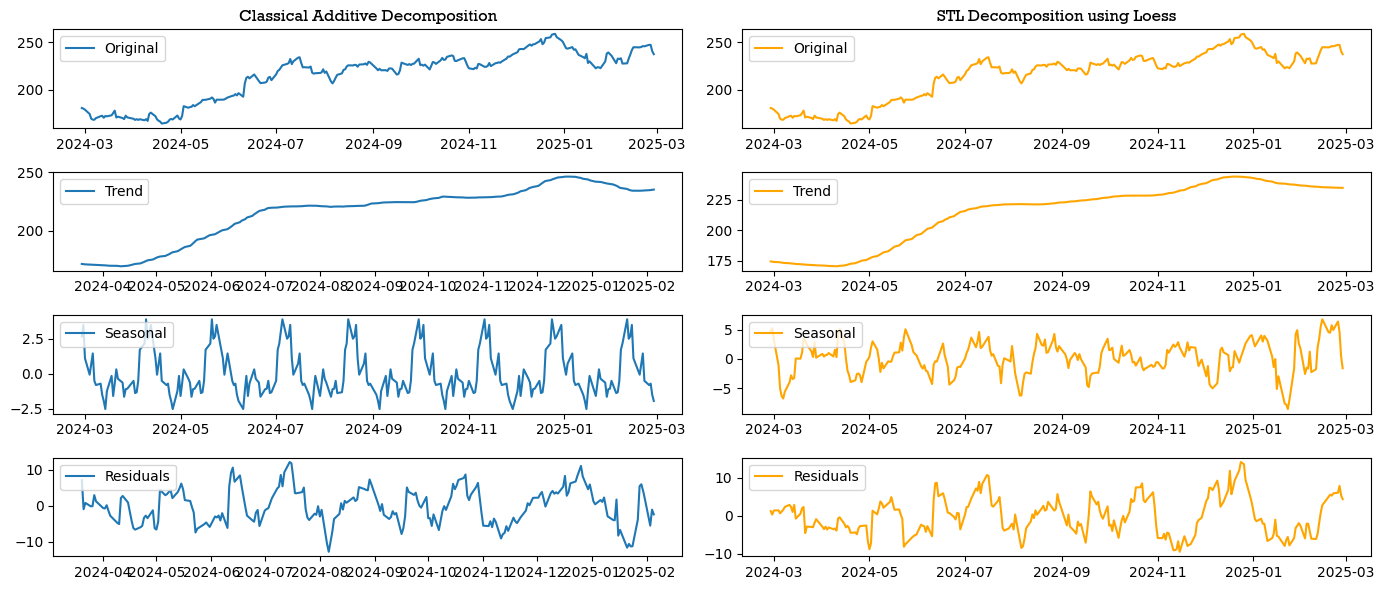

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(4, 2, 1)
plt.plot(prices, label='Original')
plt.legend(loc='upper left')
plt.title("Classical Additive Decomposition", fontname='Rockwell') 
plt.subplot(4, 2, 3)
plt.plot(trend_add, label='Trend')
plt.legend(loc='upper left') 
plt.subplot(4, 2, 5)
plt.plot(seasonal_add, label='Seasonal')
plt.legend(loc='upper left') 
plt.subplot(4, 2, 7)
plt.plot(resid_add, label='Residuals')
plt.legend(loc='upper left')

plt.subplot(4, 2, 2)
plt.plot(result.observed, label='Original', color='orange')
plt.legend(loc='upper left') 
plt.title("STL Decomposition using Loess", fontname='Rockwell') 
plt.subplot(4, 2, 4)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left') 
plt.subplot(4, 2, 6)
plt.plot(result.seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left') 
plt.subplot(4, 2, 8)
plt.plot(result.resid, label='Residuals', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Identify White Noise & Random Walk TS Data

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(prices, lags=[10], return_df=True)
print("P-value < 0.05 ==> Random Walk data")
print("P-value > 0.05 ==> White Noise data\n")
print(lb_test)

P-value < 0.05 ==> Random Walk data
P-value > 0.05 ==> White Noise data

       lb_stat  lb_pvalue
10  2180.56939        0.0


# Stationarity Test

In [ ]:
# week stationary data test (ADF & KPSS)
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def adf_test(series):
    result = adfuller(series)

    print("Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value\n")
    print("ADF Test Results: Statistics:", round(result[0], 3), end="  ")
    print("P-value:", result[1])
    print("Critical Values: ")
    for key, val in result[4].items():
        print(f"    {key} : {val:.3f}")

def kpss_test(series):
    result = kpss(series, regression='ct') # data is stationary around constant/trend

    print("Stationay Rules: P_value > 0.05 || Statistics_value < Critical_value\n")
    print("KPSS Test Results: Statistics:", round(result[0], 3), end="  ")
    print("P-value:", result[1])
    print("Critical Values: ")
    for key, val in result[3].items():
        print(f"    {key} : {val}")

In [ ]:
adf_test(prices)

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: -1.208  P-value: 0.670217184509637
Critical Values: 
    1% : -3.457
    5% : -2.873
    10% : -2.573


In [ ]:
kpss_test(prices)

Stationay Rules: P_value > 0.05 || Statistics_value < Critical_value

KPSS Test Results: Statistics: 0.337  P-value: 0.01
Critical Values: 
    10% : 0.119
    5% : 0.146
    2.5% : 0.176
    1% : 0.216


C:\Users\bhaut\AppData\Local\Temp\ipykernel_15016\3258490020.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='ct') # data is stationary around constant/trend


In [ ]:
# streek stationary data test (KS-test)
from scipy.stats import ks_2samp

In [ ]:
np.random.seed(0)  # generatic synthetic data for demo
n = 500
strict_stat_series = np.random.normal(0, 1, n)
week_stat_series = np.concatenate([np.random.normal(0, 1, n//2), np.random.normal(0, 2, n//2)])

# split the series into two havels and perform KS-test
def ksTestStationarity(series):
    split_len = len(series) // 2
    first_half_series = series[:split_len]
    second_half_series = series[split_len:]

    stat, p_val = ks_2samp(first_half_series, second_half_series)
    return stat, p_val

stric_stat, stric_p_val = ksTestStationarity(strict_stat_series)
week_stat, week_p_val = ksTestStationarity(week_stat_series)

print("Streek Stationay Rules: P_value > 0.05")

Streek Stationay Rules: P_value > 0.05


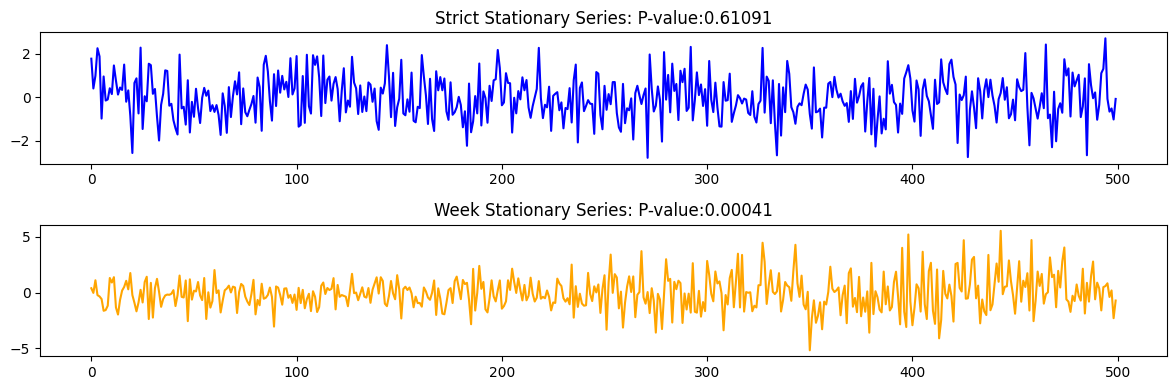

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
plt.plot(strict_stat_series, color='blue')
plt.title(f"Strict Stationary Series: P-value:{stric_p_val:.5f}")

plt.subplot(2, 1, 2)
plt.plot(week_stat_series, color='orange')
plt.title(f"Week Stationary Series: P-value:{week_p_val:.5f}")

plt.tight_layout()
plt.show()

# Making a Stationary TS Data

In [ ]:
# differencing
first_order = prices.diff()
second_order = first_order.diff()

In [ ]:
# Transformation
price_log = np.log(prices)
price_sqrt = np.sqrt(prices)

price_boxcox, lam = stats.boxcox(prices.values[prices>0]) # only positive value require

In [ ]:
adf_test(first_order.dropna()) # use bcs remove null value

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: -14.84  P-value: 1.8435718641344074e-27
Critical Values: 
    1% : -3.457
    5% : -2.873
    10% : -2.573


In [ ]:
adf_test(price_log) 

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: -1.182  P-value: 0.6814788099754238
Critical Values: 
    1% : -3.457
    5% : -2.873
    10% : -2.573


In [ ]:
# De-tranding using linear trend

trend = np.polyfit(np.arange(len(prices)), prices, 1)
trend_line = np.polyval(trend, np.arange(len(prices)))
price_detrended = prices.values - trend_line

In [ ]:
adf_test(price_detrended[0])

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: 0.226  P-value: 0.9736676137994007
Critical Values: 
    1% : -3.457
    5% : -2.873
    10% : -2.573


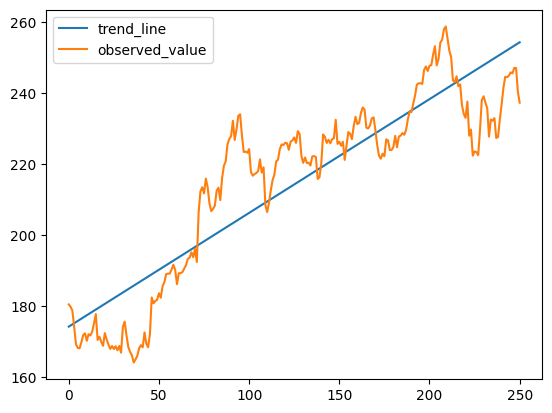

In [ ]:
plt.plot(np.arange(len(prices)), trend_line, label='trend_line')
plt.plot(np.arange(len(prices)), prices, label='observed_value')
plt.legend()
plt.show()

In [ ]:
# De-tranding using moving average
window_size = 12
price_ma = prices.rolling(window=window_size).mean()
price_detrended = prices - price_ma
price_detrended = price_detrended.dropna()

In [ ]:
adf_test(price_detrended)

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: -4.544  P-value: 0.00016330948899826597
Critical Values: 
    1% : -3.458
    5% : -2.874
    10% : -2.573


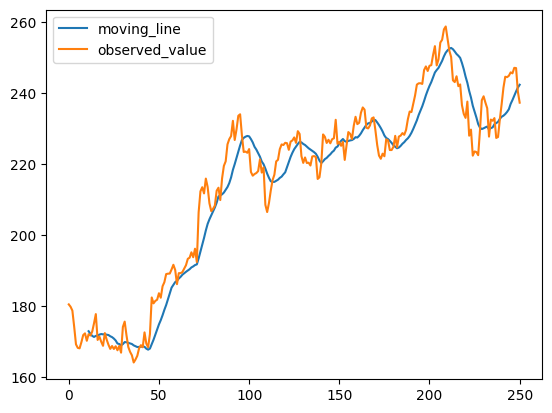

In [ ]:
plt.plot(np.arange(len(prices)), price_ma, label='moving_line')
plt.plot(np.arange(len(prices)), prices, label='observed_value')
plt.legend()
plt.show()

In [ ]:
# Seasonal Adjustment
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(prices, model='additive', period=30)
price_adjusted = prices.values / decomposition.seasonal.values

In [ ]:
adf_test(price_adjusted[0])

Stationay Rules: P_value < 0.05 || Statistics_value > Critical_value

ADF Test Results: Statistics: -6.176  P-value: 6.61733795189737e-08
Critical Values: 
    1% : -3.459
    5% : -2.874
    10% : -2.573


# TS Forecasting Model

In [ ]:
# AR,  MA,  ARMA,  ARIMA, SARIMA <== Univariate/single variable
# VAR, VMA, VARMA, VARIMA <== Multivariate/multi-variable   (V <=> Vector) 

# Seasonal Autoregressive Integrated Moving Average

In [ ]:
# first_order ==> stationary data
data = first_order.dropna()

# split the data
train_data, test_data = data.iloc[:-30], data.iloc[-30:]

### AR Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_data, lags=30) # 30 days prev & future predict
model = model.fit()

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Make Prediction on the data
predictions = model.predict(start=len(train_data),
                           end=len(train_data)+len(test_data)-1,
                           dynamic=False) 

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# visualize prediction and actual
plt.figure(figsize=(15, 4))
plt.plot(test_data.index, test_data, label="Test data")
plt.plot(test_data.index, predictions, color='red', linestyle='--', label="Predicted data")

plt.title("Apple Stock Price: Actual vs Predicted", fontname='Rockwell')
plt.xlabel("Date")
plt.xlabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'test_data' is not defined

<Figure size 1500x400 with 0 Axes>

In [ ]:
print(f"RMSE: {root_mean_squared_error(test_data, predictions):.2f}")
print(model.aic, model.bic)

NameError: name 'test_data' is not defined

### AR/MA/ARMA/`ARIMA` Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(7,1,30)) # (p,d,q) set based on the Model
model = model.fit()

NameError: name 'train_data' is not defined

In [ ]:
# Make Prediction on the data
predictions = model.predict(start=len(train_data),
                           end=len(train_data)+len(test_data)-1,
                           dynamic=False) 

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


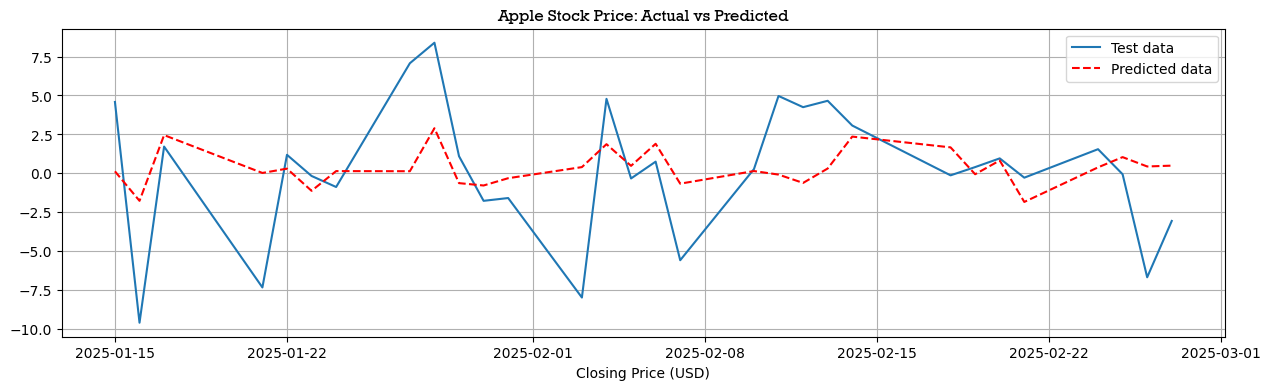

In [ ]:
# visualize prediction and actual
plt.figure(figsize=(15, 4))
plt.plot(test_data.index, test_data, label="Test data")
plt.plot(test_data.index, predictions, color='red', linestyle='--', label="Predicted data")

plt.title("Apple Stock Price: Actual vs Predicted", fontname='Rockwell')
plt.xlabel("Date")
plt.xlabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"RMSE: {root_mean_squared_error(test_data, predictions):.2f}")
print(model.aic, model.bic)

RMSE: 3.95


### `SARIMA` Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order=(7, 1, 7), seasonal_order=(1, 1, 1, 45)) # (p,d,q) & (P,D,Q,S)
model = model.fit()

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Make Prediction on the data
predictions = model.predict(start=len(train_data),
                           end=len(train_data)+len(test_data)-1,
                           dynamic=False)

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


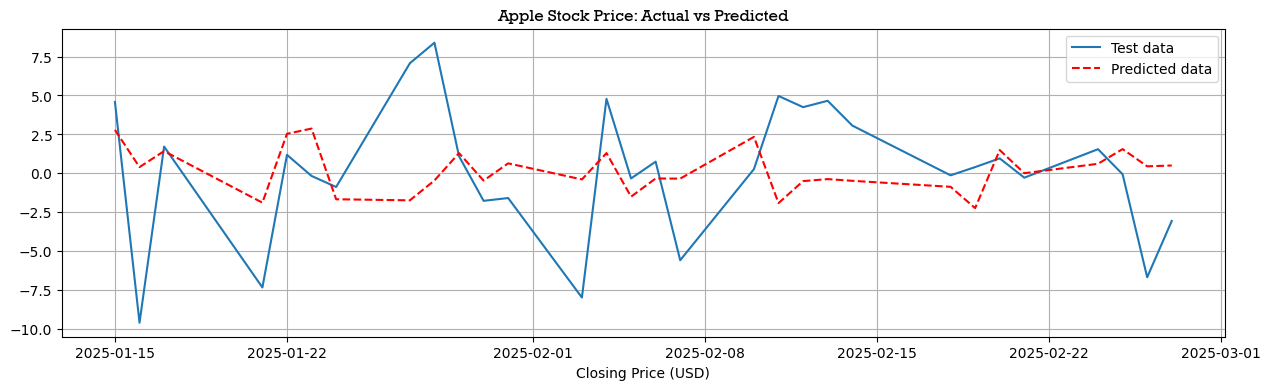

In [ ]:
# visualize prediction and actual
plt.figure(figsize=(15, 4))
plt.plot(test_data.index, test_data, label="Test data")
plt.plot(test_data.index, predictions, color='red', linestyle='--', label="Predicted data")

plt.title("Apple Stock Price: Actual vs Predicted", fontname='Rockwell')
plt.xlabel("Date")
plt.xlabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"RMSE: {root_mean_squared_error(test_data, predictions):.2f}")
print(model.aic, model.bic)

RMSE: 4.45


### `Vector` Model

In [ ]:
stock_data = pd.DataFrame()

stock_data['Tesla'] = tesla_prices
stock_data['Apple'] = prices.shift() # yesterday data based predict today tesla data
stock_data.dropna(inplace=True)

In [ ]:
# check causality
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(stock_data.dropna(), maxlag=[14])
print() # P-value < 0.05 ==> Tesla stock closing price affected by Apple closing price


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.4108  , p=0.1501  , df_denom=207, df_num=14
ssr based chi2 test:   chi2=22.5187 , p=0.0686  , df=14
likelihood ratio test: chi2=21.5082 , p=0.0893  , df=14
parameter F test:         F=1.4108  , p=0.1501  , df_denom=207, df_num=14



In [ ]:
data = stock_data.diff().dropna()
train_data, test_data = data[:-14], data[-14:]

In [ ]:
from statsmodels.tsa.api import VAR, VARMAX

model = VAR(train_data)
model = model.fit(maxlags=7)
predictions = model.forecast(train_data.values[-model.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
print("RMSE:", root_mean_squared_error(test_data['Tesla'], predictions['Tesla']))
print(model.aic, model.bic)

RMSE: 14.644049770845546


c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


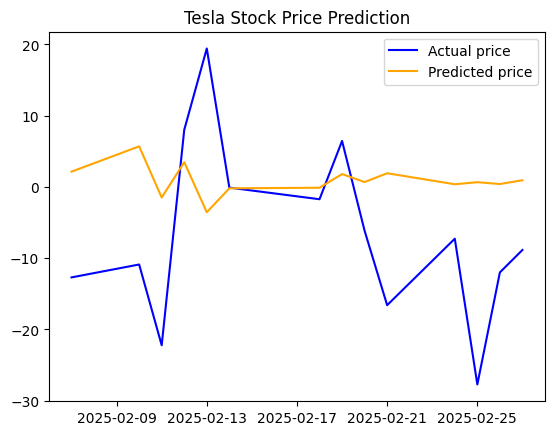

In [ ]:
plt.plot(test_data.index, test_data['Tesla'], label="Actual price", color='blue')
plt.plot(test_data.index, predictions['Tesla'], label="Predicted price", color='orange')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

In [ ]:
# VMA(0, n) | VARMA(m, n)
model = VARMAX(train_data, order=(14, 14)) 
model = model.fit()

predictions = model.predict(start=len(train_data),
                           end=len(train_data)+len(test_data)-1,
                           dynamic=False)

print("RMSE:", root_mean_squared_error(test_data['Tesla'], predictions['Tesla']))
print(model.aic, model.bic)

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 14.043523880901954


c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


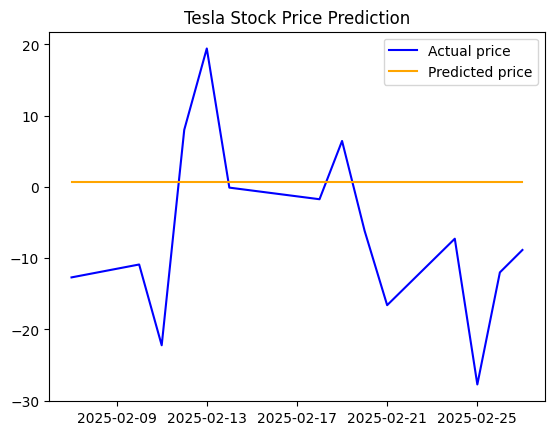

In [ ]:
plt.plot(test_data.index, test_data['Tesla'], label="Actual price", color='blue')
plt.plot(test_data.index, predictions['Tesla'], label="Predicted price", color='orange')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# Smoothing Methods

### Moving Average

In [ ]:
window_size = 20

# Simple MA
stock_data["SMA"] = stock_data['Apple'].rolling(window=window_size).mean()

# Weighted MA
weights = np.arange(1, window_size+1)
stock_data["WMA"] = stock_data['Apple'].rolling(window=window_size).apply(lambda price: np.dot(price, weights)/weights.sum(), raw=True)

# Exponential MA
stock_data["EMA"] = stock_data['Apple'].ewm(span=window_size).mean()

### Exponential

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Apple']

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.7) # 0 means no noise ==> high smoothing
stock_data["SES"] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) — Holt's linear trend model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.7)
stock_data["DES"] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) — Holt's Winters method
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
stock_data["TES"] = tes_model.fittedvalues

c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhaut\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency

In [ ]:
stock_data.tail()

,Tesla,Apple,SMA,WMA,SES,DES,TES
Date,,,,,,,
2025-02-21,337.799988,245.830002,234.851250,237.622826,244.627401,244.985615,244.373409
2025-02-24,330.529999,245.550003,235.958032,238.377795,245.469222,245.827436,245.384998
2025-02-25,302.799988,247.100006,237.186266,239.208482,245.525769,245.883983,245.914800
2025-02-26,290.799988,247.039993,238.057889,239.954340,246.627735,246.985949,246.871146
2025-02-27,281.950012,240.360001,238.175973,239.992975,246.916316,247.274530,246.156201


# ACF & PACF to selecting Best model and also order

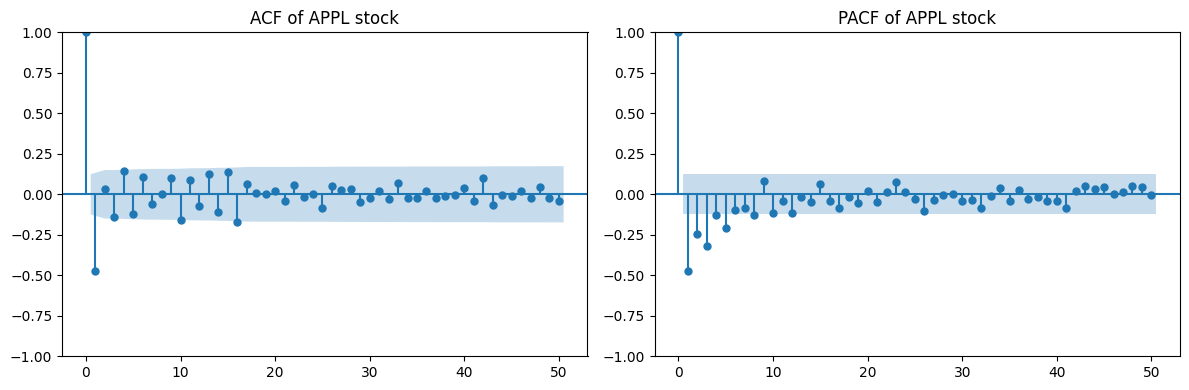

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Apple'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title("ACF of APPL stock")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Apple'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title("PACF of APPL stock")


plt.tight_layout()
plt.show()

### Conclusion q=1, p=5, s!=present, ARIMA model

# ---